In [1]:
import os
import json
from zipfile import ZipFile

In [ ]:
!pip install kaggle

In [ ]:
kaggle_credentials = json.load(open('kaggle.json'))

In [ ]:
os.environ['KAGGLE_USERNAME'] = kaggle_credentials['username']
os.environ['KAGGLE_KEY'] = kaggle_credentials['key']

In [ ]:
!kaggle datasets download paultimothymooney/chest-xray-pneumonia

Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
License(s): other
100% 2.29G/2.29G [01:31<00:00, 28.5MB/s]
100% 2.29G/2.29G [01:31<00:00, 26.9MB/s]


In [ ]:
!unzip /content/chest-xray-pneumonia.zip -d /content/drive/MyDrive/Datasets

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/Datasets/chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: /content/drive/MyDrive/Datasets/chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: /content/drive/MyDrive/Datasets/chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: /content/drive/MyDrive/Datasets/chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: /content/drive/MyDrive/Datasets/chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: /content/drive/MyDrive/Datasets/chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: /content/drive/MyDrive/Datasets/chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: /content/drive/MyDrive/Datasets/chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: /content/drive/MyDrive/Datasets/chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: /content/drive/MyDrive/Datasets/chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: /content/drive/MyDriv

In [ ]:
!ls

chest-xray-pneumonia.zip  drive  kaggle.json  sample_data


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [3]:
datadir = r"/content/drive/MyDrive/Datasets/chest_xray/train"

In [4]:
os.listdir('/content/drive/MyDrive/Datasets/chest_xray/train/')

['NORMAL', 'PNEUMONIA']

In [5]:
len(os.listdir('/content/drive/MyDrive/Datasets/chest_xray/train/NORMAL'))

1341

In [6]:
len(os.listdir('/content/drive/MyDrive/Datasets/chest_xray/train/PNEUMONIA'))

3875

In [7]:
categories = ['NORMAL','PNEUMONIA']


In [8]:
os.path.join(datadir,'NORMAL')

'/content/drive/MyDrive/Datasets/chest_xray/train/NORMAL'

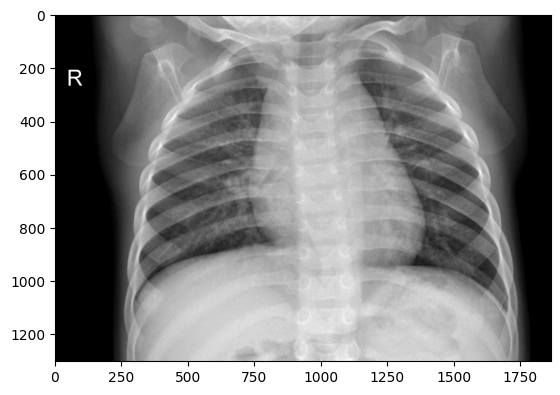

In [9]:
for i in categories:
  path = os.path.join(datadir,i)
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
    plt.imshow(img_array,cmap='grey')
    plt.show()
    break
  break # convert images into grayscale

In [ ]:
# initializing the size of the image so that every image should be in same dimension

In [10]:
img_size = 100

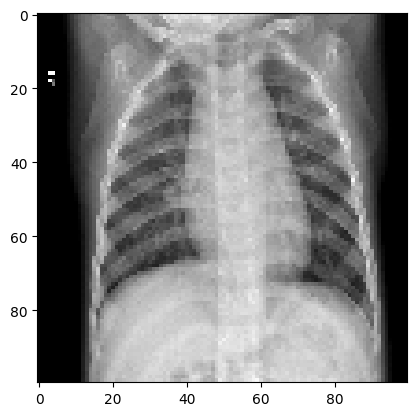

In [11]:
new_arr = cv2.resize(img_array,(img_size,img_size))
plt.imshow(new_arr,cmap='gray')
plt.show()

to improvise a classification model or cnn model , increasing image size can be one step

In [12]:
training_data = []

In [13]:
def create_training_data():
  for i in categories:
    path = os.path.join(datadir,i)
    class_num = categories.index(i)
    for img in os.listdir(path):
      try:
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        new_array = cv2.resize(img_array, (img_size, img_size))
        training_data.append([new_array,class_num])

      except Exception as e:
        pass

In [14]:
create_training_data()

In [15]:
print(len(training_data))

5216


In [16]:
import random
random.shuffle(training_data)
for sample in training_data[:10]:
  print(sample)

[array([[212, 196, 151, ..., 115, 117, 117],
       [198, 169, 151, ..., 124, 120, 122],
       [184, 147, 104, ..., 124, 128, 123],
       ...,
       [ 40,  99, 161, ...,  33,  36,  55],
       [ 44, 103, 162, ...,  33,  36,  56],
       [ 46, 110, 171, ...,  33,  37,  52]], dtype=uint8), 1]
[array([[ 0,  0, 13, ..., 31, 18,  1],
       [ 0,  0, 10, ..., 26, 16,  0],
       [ 0,  0, 10, ..., 24, 11,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint8), 0]
[array([[70, 82, 82, ..., 75, 51, 42],
       [74, 76, 84, ..., 74, 64, 41],
       [68, 76, 76, ..., 75, 57, 41],
       ...,
       [ 0,  0,  0, ..., 10,  0,  0],
       [ 0,  0,  0, ..., 12,  0,  0],
       [ 0,  0,  0, ..., 15,  0,  0]], dtype=uint8), 0]
[array([[ 24,  12,  11, ...,  35, 160, 169],
       [ 24,   7,   9, ...,  37, 168, 156],
       [  8,   9,  13, ...,  35, 165, 177],
       ...,
       [ 12,  32,  49, ...,  16,  52,  20]

In [17]:
X = []
Y = []

In [18]:
for features,label in training_data:
  X.append(features)
  Y.append(label)

print(X[0].reshape(-1,img_size,img_size,1))

[[[[212]
   [196]
   [151]
   ...
   [115]
   [117]
   [117]]

  [[198]
   [169]
   [151]
   ...
   [124]
   [120]
   [122]]

  [[184]
   [147]
   [104]
   ...
   [124]
   [128]
   [123]]

  ...

  [[ 40]
   [ 99]
   [161]
   ...
   [ 33]
   [ 36]
   [ 55]]

  [[ 44]
   [103]
   [162]
   ...
   [ 33]
   [ 36]
   [ 56]]

  [[ 46]
   [110]
   [171]
   ...
   [ 33]
   [ 37]
   [ 52]]]]


In [19]:
y = np.array(Y)

In [20]:
X = np.array(X).reshape(-1,img_size,img_size,1)

In [21]:
validation_data = []
datadir_val = r"/content/drive/MyDrive/Datasets/chest_xray/val"

In [22]:
def create_val_data():
  for i in categories:
    path = os.path.join(datadir_val, i)
    class_num = categories.index(i)
    for img in os.listdir(path):
      try:
        img_arr = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        new_arr = cv2.resize(img_arr,(img_size,img_size))
        validation_data.append([new_arr,class_num])
      except Exception as e:
        pass


In [23]:
create_val_data()

In [24]:
print(len(validation_data))

16


In [25]:
import random
random.shuffle(validation_data)
for sample in validation_data[:10]:
  print(sample)

[array([[17, 19, 26, ..., 27, 15, 17],
       [18, 23, 33, ..., 53, 43, 22],
       [19, 27, 32, ..., 51, 35, 28],
       ...,
       [ 6,  4,  5, ...,  0,  2,  3],
       [ 6,  4,  5, ...,  0,  2,  3],
       [ 5,  6,  3, ...,  0,  2,  0]], dtype=uint8), 1]
[array([[  0,  20,  15, ...,  10,  14,  15],
       [239,  19,  15, ...,  12,  13,  14],
       [ 21,  18,  15, ...,  11,  14,  15],
       ...,
       [ 30,  33,  31, ...,  35,  32,  32],
       [ 32,  34,  29, ...,  35,  32,  27],
       [ 44,  33,  31, ...,  37,  30,  27]], dtype=uint8), 0]
[array([[0, 1, 3, ..., 0, 0, 0],
       [0, 0, 2, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8), 1]
[array([[ 2,  1,  1, ...,  0, 11, 10],
       [ 2,  1,  1, ...,  0, 10,  4],
       [ 2,  1,  2, ..., 18, 10,  0],
       ...,
       [ 7,  6,  5, ...,  8,  8,  8],
       [ 7,  6,  5, ...,  8,  8,  8],
       [ 7,  6,  6, 

In [26]:
X_val = []
y_val = []

In [27]:
for features,label in validation_data:
  X_val.append(features)
  y_val.append(label)


In [28]:
y_val = np.array(y_val)
X_val = np.array(X_val).reshape(-1,img_size,img_size,1)

In [29]:
import tensorflow as tf
from keras.models import Sequential

In [30]:
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle

In [31]:
X = X/255.0
X_val = X_val/255.0

In [32]:
X.shape

(5216, 100, 100, 1)

In [33]:
X_val.shape

(16, 100, 100, 1)

In [34]:
print(X.shape[1:])

(100, 100, 1)


In [35]:
model = Sequential()

model.add(Conv2D(64, (3,3),input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3,3),input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(256, (3,3),input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(64))

model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [36]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 98, 98, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 98, 98, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 49, 49, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 49, 49, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 47, 47, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 47, 47, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 23, 23, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 23, 23, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 21, 21, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 21, 21, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 10, 10, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 10, 10, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       1,638,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,008,193 (7.66 MB)

 Trainable params: 2,008,193 (7.66 MB)

 Non-trainable params: 0 (0.00 B)

In [37]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


In [38]:
import time

In [39]:
t_initial = time.time()
model.fit(X,y, batch_size=4,epochs=10,validation_data=(X_val,y_val))
print("Training time:", time.time()-t_initial)

Epoch 1/10
1304/1304 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.8341 - loss: 0.4498 - val_accuracy: 0.8125 - val_loss: 0.5389
Epoch 2/10
1304/1304 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.9414 - loss: 0.1506 - val_accuracy: 0.8750 - val_loss: 0.2286
Epoch 3/10
1304/1304 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9575 - loss: 0.1254 - val_accuracy: 0.8750 - val_loss: 0.3448
Epoch 4/10
1304/1304 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9585 - loss: 0.1100 - val_accuracy: 0.8750 - val_loss: 0.2529
Epoch 5/10
1304/1304 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9644 - loss: 0.0974 - val_accuracy: 0.8125 - val_loss: 0.4386
Epoch 6/10
1304/1304 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9695 - loss: 0.0860 - val_accuracy: 1.0000 - val_loss: 0.0399
Epoch 7/10
1304/1304 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9760 - loss: 0.0700 - val_accuracy: 0.9375 - val_loss: 0.1275
Epoch 8/10
1304/1304 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9763 - loss: 0.06

In [ ]:
# saving the model

In [41]:
model.save(r"/content/drive/MyDrive/Datasets/chest_xray/model.h5")

In [42]:
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.models import load_model

In [43]:
categories = ['NORMAL','PNEUMONIA']

In [44]:
def prepare(image):
  img_size =100
  img = tf.keras.preprocessing.image.load_img(image,color_mode='grayscale',target_size=(img_size,img_size))
  new_arr = tf.keras.preprocessing.image.img_to_array(img)

  return new_arr.reshape(-1,img_size,img_size,1)

In [45]:
model = tf.keras.models.load_model("/content/drive/MyDrive/Datasets/chest_xray/model.h5")

In [48]:
image = r"/content/drive/MyDrive/Datasets/chest_xray/test/NORMAL/IM-0007-0001.jpeg"

In [49]:
pred = model.predict([prepare(image)/255.0])
print(pred)
print(round(pred[0][0]))
print(categories[int(round(pred[0][0]))])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
[[0.04990385]]
0
NORMAL


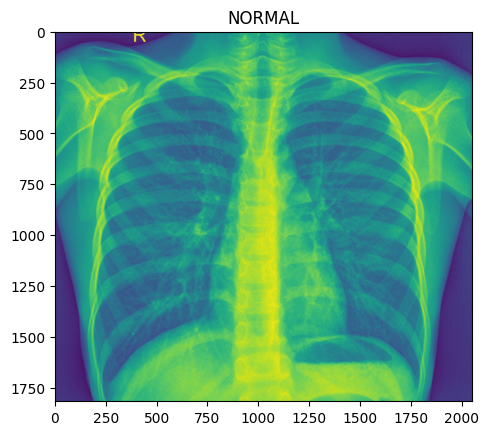

In [50]:
img = mpimg.imread(image)
imgplot = plt.imshow(img)
plt.title(categories[int(pred[0][0])])
plt.show()

In [51]:
import os
import cv2
import numpy as np
import tensorflow as tf
from keras.models import load_model

In [52]:
test_dir = "/content/drive/MyDrive/Datasets/chest_xray/test"

categories = ['NORMAL',"PNEUMONIA"]

img_size = 100

model = load_model('/content/drive/MyDrive/Datasets/chest_xray/model.h5')

In [53]:
X_test = []
y_test = []

In [54]:
for i in categories:
  path = os.path.join(test_dir, i)
  class_num = categories.index(i)
  for img in os.listdir(path):
    try:
      img_arr = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
      new_arr = cv2.resize(img_arr,(img_size,img_size))
      X_test.append(new_arr)
      y_test.append(class_num)
    except Exception as e:
      pass

In [55]:
X_test = np.array(X_test).reshape(-1,img_size,img_size,1)
y_test = np.array(y_test)

In [56]:
X_test = X_test/255.0
test_loss, test_acc = model.evaluate(X_test,y_test,verbose=2)

print('Test Accuracy',test_acc)


20/20 - 2s - 96ms/step - accuracy: 0.7468 - loss: 1.6919
Test Accuracy 0.7467948794364929


In [57]:
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model

In [58]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [59]:
img_size= 100
base_model = VGG16(input_shape=(img_size,img_size,3),include_top=False,weights='imagenet')

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [60]:
for layer in base_model.layers:
  layer.trainable=False

In [61]:
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)

pred = Dense(1, activation='sigmoid')(x)

In [62]:
model = Model(inputs= base_model.input, outputs = pred)

In [68]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [69]:
train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=False)
val_datagen = ImageDataGenerator(rescale=1./255)

In [70]:
train_dir = '/content/drive/MyDrive/Datasets/chest_xray/train'
val_dir = '/content/drive/MyDrive/Datasets/chest_xray/val'

In [71]:
train_gen = train_datagen.flow_from_directory(train_dir,target_size=(img_size,img_size),batch_size=32, class_mode='binary')
val_gen = val_datagen.flow_from_directory(val_dir,target_size=[img_size,img_size],batch_size=32,class_mode='binary')


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [72]:
t_initial = time.time()
model.fit(train_gen,epochs=10,validation_data=val_gen)
print("Training time:", time.time()-t_initial)

Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 94s 537ms/step - accuracy: 0.8349 - loss: 0.3535 - val_accuracy: 0.6875 - val_loss: 0.6125
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 139s 550ms/step - accuracy: 0.9481 - loss: 0.1421 - val_accuracy: 0.6875 - val_loss: 0.7683
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 136s 514ms/step - accuracy: 0.9468 - loss: 0.1324 - val_accuracy: 0.8750 - val_loss: 0.2339
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 81s 493ms/step - accuracy: 0.9570 - loss: 0.1176 - val_accuracy: 0.7500 - val_loss: 0.4740
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 83s 511ms/step - accuracy: 0.9580 - loss: 0.1143 - val_accuracy: 0.7500 - val_loss: 0.4392
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 80s 493ms/step - accuracy: 0.9594 - loss: 0.1047 - val_accuracy: 0.8125 - val_loss: 0.2445
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 81s 495ms/step - accuracy: 0.9651 - loss: 0.0973 - val_accuracy: 0.8125 - val_loss: 0.2668
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 80s 489ms/step - accuracy: 0.9582 - loss:

In [73]:
test_dir = '/content/drive/MyDrive/Datasets/chest_xray/test'
test_datagen = ImageDataGenerator(rescale=1./255)
test_gen = test_datagen.flow_from_directory(test_dir,target_size=(img_size,img_size),batch_size=32,class_mode='binary',shuffle=False)
test_loss, test_acc = model.evaluate(test_gen)
print('Test accuracy : ',test_acc)

Found 624 images belonging to 2 classes.
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 287ms/step - accuracy: 0.7659 - loss: 0.7834
Test accuracy :  0.8589743375778198


In [74]:
model.save('/content/drive/MyDrive/Datasets/chest_xray/pretrained_model.h5')

In [75]:
model = tf.keras.models.load_model('/content/drive/MyDrive/Datasets/chest_xray/pretrained_model.h5')

In [76]:
model.summary()

Model: "functional_51"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 100, 100, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 100, 100, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 100, 100, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 50, 50, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 50, 50, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 50, 50, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 25, 25, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 25, 25, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 25, 25, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 25, 25, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 12, 12, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 12, 12, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 12, 12, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 6, 6, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 6, 6, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 6, 6, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 6, 6, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 3, 3, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │       1,179,904 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 15,935,811 (60.79 MB)

 Trainable params: 1,221,121 (4.66 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 2 (12.00 B)

15.9 million

In [77]:
test_dir = '/content/drive/MyDrive/Datasets/chest_xray/test'
test_datagen = ImageDataGenerator(rescale=1./255)
test_gen = test_datagen.flow_from_directory(test_dir,target_size=(img_size,img_size),batch_size=32,class_mode='binary',shuffle=False)
test_loss, test_acc = model.evaluate(test_gen)
print('Test accuracy : ',test_acc)

Found 624 images belonging to 2 classes.
20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 400ms/step - accuracy: 0.7659 - loss: 0.7834
Test accuracy :  0.8589743375778198
